# Feature Points Detection

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

imagesDir = './data'

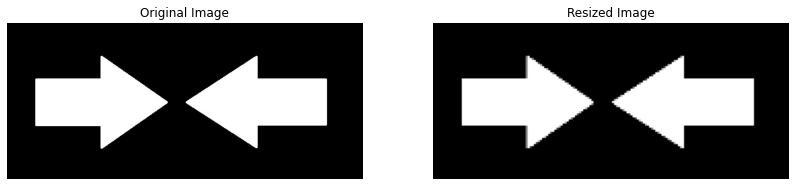

In [75]:
filename = 'corners_01.jpg'
img = cv2.imread(os.path.join(imagesDir, filename))
img_resize = cv2.resize(img, (0,0), fx=0.25, fy=0.25)

fig, ax = plt.subplots(1,2,figsize=(14,10))

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_resize)
ax[1].set_title('Resized Image')
ax[1].axis('off')

plt.show()

## Corner Detection

[Harris Corner Detector](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345)

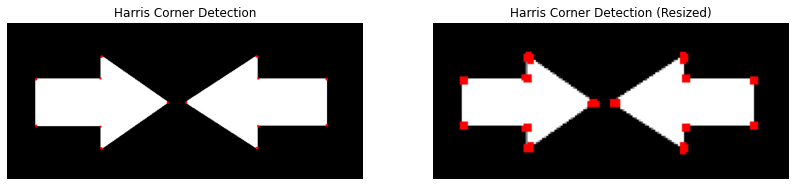

In [80]:
copy = img.copy() # copy the image to be able to use it later without having to read it again
copy_resize = img_resize.copy() # copy the image to be able to use it later without having to read it again

gray = cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
gray_resize = cv2.cvtColor(copy_resize, cv2.COLOR_BGR2GRAY)
gray_resize = np.float32(gray_resize)

neighbourhood = 2
aperture = 3
free_param = 0.04
dst = cv2.cornerHarris(gray, neighbourhood, aperture, free_param)
dst_resize = cv2.cornerHarris(gray_resize, neighbourhood, aperture, free_param)

# Result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)
dst_resize = cv2.dilate(dst_resize, None)

# Threshold for an optimal value, it may vary depending on the image
thr = 0.01

copy[dst > thr*dst.max()] = [0,0,255]
copy_resize[dst_resize > thr*dst_resize.max()] = [0,0,255]

# Convert to RGB for plotting with matplotlib
out = cv2.cvtColor(copy, cv2.COLOR_BGR2RGB)
out_resize = cv2.cvtColor(copy_resize, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2,figsize=(14,10))

ax[0].imshow(out)
ax[0].set_title('Harris Corner Detection')
ax[0].axis('off')

ax[1].imshow(out_resize)
ax[1].set_title('Harris Corner Detection (Resized)')
ax[1].axis('off')

plt.show()

[Shi-Tomasi Corner Detector](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541)

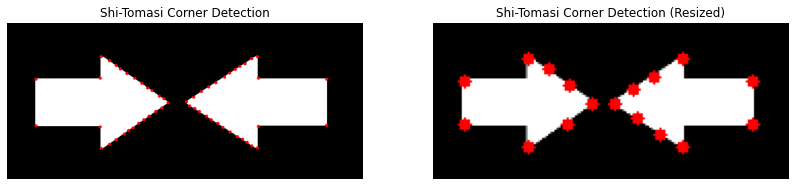

In [84]:
copy = img.copy() # copy the image to be able to use it later without having to read it again
copy_resize = img_resize.copy() # copy the image to be able to use it later without having to read it again

max_corners = 200
quality = 0.01
mindist = 10
corners = cv2.goodFeaturesToTrack(gray, max_corners, quality, mindist, blockSize=neighbourhood, k=free_param)
corners = np.int0(corners)
corners_resized = cv2.goodFeaturesToTrack(gray_resize, max_corners, quality, mindist, blockSize=neighbourhood, k=free_param)
corners_resized = np.int0(corners_resized)

def draw_corners(corners, copy):
    for i in corners:
        x,y = i.ravel()
        cv2.circle(copy, (x,y), 3, 255, -1)
        
draw_corners(corners, copy)
draw_corners(corners_resized, copy_resize)

fig, ax = plt.subplots(1,2,figsize=(14,10))

ax[0].imshow(copy)
ax[0].set_title('Shi-Tomasi Corner Detection')
ax[0].axis('off')

ax[1].imshow(copy_resize)
ax[1].set_title('Shi-Tomasi Corner Detection (Resized)')
ax[1].axis('off')

plt.show()

[FAST Corner Detector](https://docs.opencv.org/4.x/df/d74/classcv_1_1FastFeatureDetector.html)

Threshold: 10
NMS:True
Neighborhood: 2
Total Keypoints with NMS: 14
Total Keypoints with NMS (Resized): 7


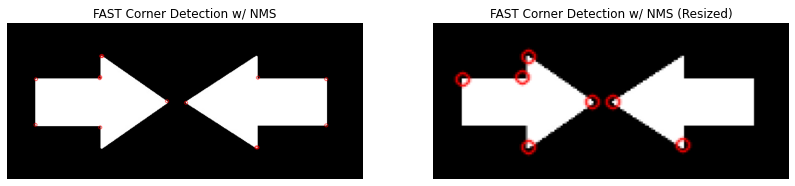

Total Keypoints without NMS: 92
Total Keypoints without NMS (Resized): 101


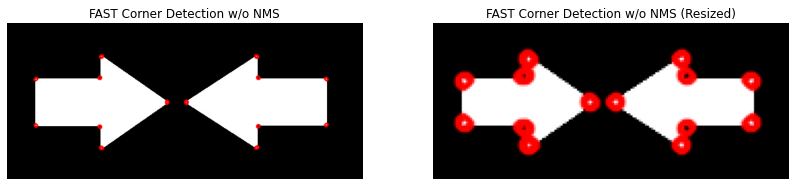

In [85]:
copy = img.copy() # copy the image to be able to use it later without having to read it again
copy_resize = img_resize.copy() # copy the image to be able to use it later without having to read it again

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# Find and draw the keypoints
kp = fast.detect(copy, None)
fast1 = cv2.drawKeypoints(copy, kp, None, color=(255,0,0))

kp_resize = fast.detect(copy_resize, None)
fast1_resize = cv2.drawKeypoints(copy_resize, kp_resize, None, color=(255,0,0))

# Print all default params
print("Threshold: {}".format(fast.getThreshold()))
print("NMS:{}".format(fast.getNonmaxSuppression()))
print("Neighborhood: {}".format(fast.getType()))
print("Total Keypoints with NMS: {}".format(len(kp)))
print("Total Keypoints with NMS (Resized): {}".format(len(kp_resize)))

fig, ax = plt.subplots(1,2,figsize=(14,10))

ax[0].imshow(fast1)
ax[0].set_title('FAST Corner Detection w/ NMS')
ax[0].axis('off')

ax[1].imshow(fast1_resize)
ax[1].set_title('FAST Corner Detection w/ NMS (Resized)')
ax[1].axis('off')

plt.show()

# Disable NMS
fast.setNonmaxSuppression(0)
kp = fast.detect(copy, None)
kp_resize = fast.detect(copy_resize, None)
print("Total Keypoints without NMS: {}".format(len(kp)))
print("Total Keypoints without NMS (Resized): {}".format(len(kp_resize)))
fast2 = cv2.drawKeypoints(copy, kp, None, color=(255,0,0))
fast2_resize = cv2.drawKeypoints(copy_resize, kp_resize, None, color=(255,0,0))

fig, ax = plt.subplots(1,2,figsize=(14,10))

ax[0].imshow(fast2)
ax[0].set_title('FAST Corner Detection w/o NMS')
ax[0].axis('off')

ax[1].imshow(fast2_resize)
ax[1].set_title('FAST Corner Detection w/o NMS (Resized)')
ax[1].axis('off')

plt.show()

## Blob Detection

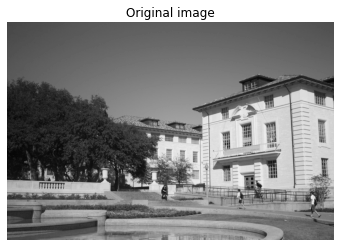

In [17]:
new_img = cv2.imread(os.path.join(imagesDir, 'stitch_building01_1.png'))
gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.show()

[SIFT Blob Detector](https://docs.opencv.org/4.x/d7/d60/classcv_1_1SIFT.html)

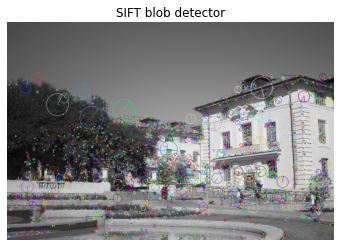

In [30]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# Find the keypoints
kp = sift.detect(gray,None)

# Draw the keypoints (with size and orientation)
sift_img = cv2.drawKeypoints(gray, kp, None, (-1, -1, -1), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(sift_img)
plt.title('SIFT blob detector')
plt.axis('off')
plt.show()

[Orb Blob Detector](https://docs.opencv.org/4.x/db/d95/classcv_1_1ORB.html)

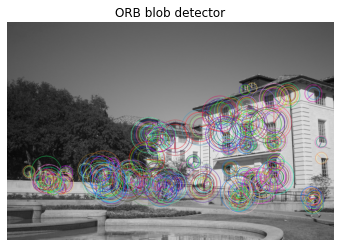

In [32]:
# Initiate ORB detector
orb = cv2.ORB_create()

# Find the keypoints with ORB
kp = orb.detect(gray, None)

# Compute the descriptors with ORB
kp, des = orb.compute(gray, kp)

# Draw only keypoints location, not size and orientation
orb_img = cv2.drawKeypoints(gray, kp, None, (-1, -1, -1), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(orb_img)
plt.title('ORB blob detector')
plt.axis('off')
plt.show()

## Matching

In [ ]:
query = cv2.imread(os.path.join(imagesDir, 'match_box01a_1.png'), cv2.IMREAD_GRAYSCALE) # queryImage
train = cv2.imread(os.path.join(imagesDir, 'match_box01a_2.png'), cv2.IMREAD_GRAYSCALE) # trainImage

plt.imshow(query, cmap='gray')
plt.title('Query Image')
plt.axis('off')
plt.show()

plt.imshow(train, cmap='gray')
plt.title('Train Image')
plt.axis('off')
plt.show()

plt.show()

In [ ]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(query, None)
kp2, des2 = orb.detectAndCompute(train, None)

In [ ]:
# create a Brute Force Matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
match_output = cv2.drawMatches(query, kp1, train, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(match_output)
plt.title('Match Result')
plt.axis('off')
plt.show()